In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [67]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

In [68]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [69]:
df = df[(df["AveRooms"] <= 10) & (df["Population"] < 2000) & (df["AveOccup"] < 4) & (df["AveBedrms"] < 1.5)]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

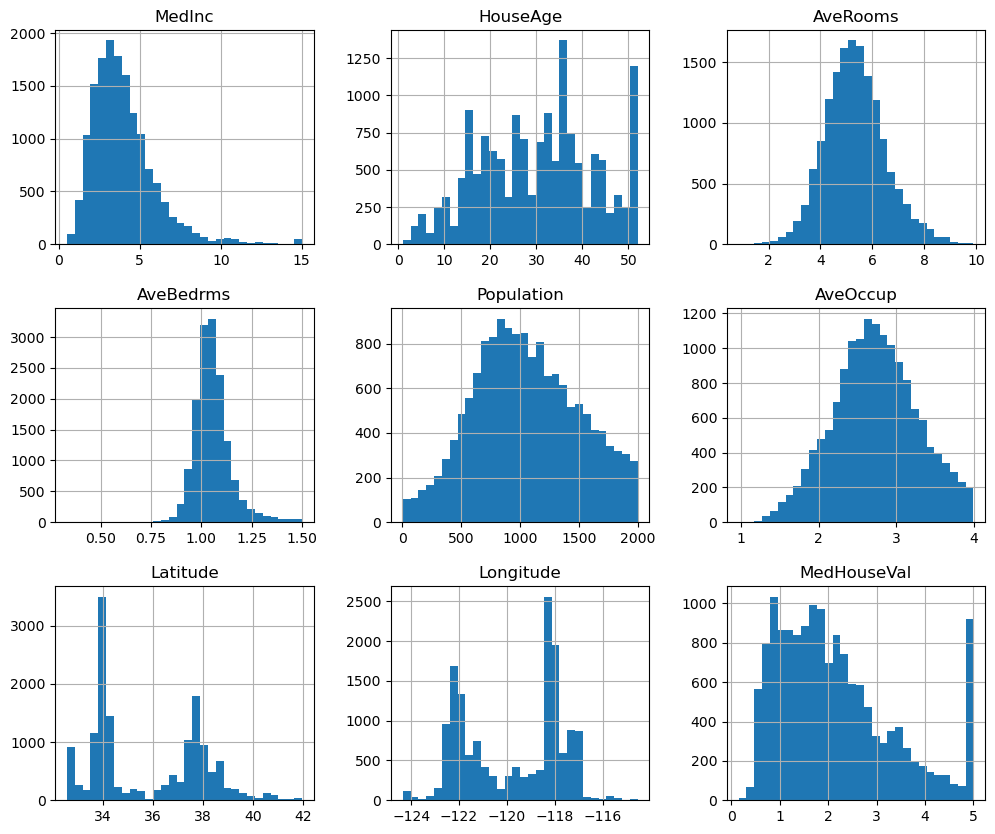

In [70]:
df.hist(figsize=(12, 10), bins=30)

In [72]:
X = np.array(df.drop("MedHouseVal", axis=1))
X.shape

(15269, 8)

In [73]:
Y = np.array(df["MedHouseVal"])
Y.shape

(15269,)

In [74]:
X_mean = np.mean(X, axis=0)
X_mean

array([   3.97263883,   30.27821075,    5.33758146,    1.05513669,
       1053.04407623,    2.73888613,   35.77075185, -119.73010348])

In [75]:
X_std = np.std(X, axis=0)
X_std

array([1.95179416e+00, 1.24417936e+01, 1.16411499e+00, 9.27509256e-02,
       4.43665394e+02, 5.42758728e-01, 2.17055115e+00, 2.02229128e+00])

In [76]:
X_train_norm = (X - X_mean) / X_std
np.ptp(X_train_norm,axis=0)

array([ 7.42916456,  4.09908743,  7.77459716, 12.56347472,  4.49437803,
        5.57656771,  4.32609017,  4.84598836])

In [78]:
def compute_cost(x, y, w, b):

    m = x.shape[0]
    return np.dot(np.dot(w, x.T) + b - y, np.dot(w, x.T) + b - y) / (2*m)

compute_cost(X_train_norm, Y, np.array([0]*X_train_norm.shape[1]), 0)

3.030933852383375

In [82]:
def compute_gradient(x, y, w, b):

    m = x.shape[0]
    return np.dot(np.dot(w, x.T) + b - y, x) / m, np.sum(np.dot(w, x.T) + b - y) / m

compute_gradient(X_train_norm, Y, np.array([0]*X_train_norm.shape[1]), 0)

(array([-8.27505017e-01, -1.58606246e-01, -4.13136506e-01,  1.06954047e-01,
         3.96507555e-02,  3.00330642e-01,  2.30495203e-01,  5.44203568e-04]),
 -2.1492591774182985)

In [87]:
def gradient_descent(x, y, w_init, b_init, alpha, n_iters):

    w = w_init
    b = b_init
    for i in range(n_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % (n_iters / 20) == 0:
            cost = compute_cost(x, y, w, b)
            print(f"{i=}, {cost=}")

    return w, b

In [90]:
w, b = gradient_descent(X_train_norm, Y, np.array([0]*X_train_norm.shape[1]), 0, 0.03, 3000)

i=0, cost=2.863979531683934
i=150, cost=0.2618864543566021
i=300, cost=0.24620488120307849
i=450, cost=0.24082521744501176
i=600, cost=0.238061852331246
i=750, cost=0.23641214825683243
i=900, cost=0.2353858884737852
i=1050, cost=0.234741058634559
i=1200, cost=0.23433494124390516
i=1350, cost=0.23407902638055472
i=1500, cost=0.23391774111613697
i=1650, cost=0.2338160912703739
i=1800, cost=0.23375202613519203
i=1950, cost=0.2337116488174951
i=2100, cost=0.23368620083573924
i=2250, cost=0.2336701621321147
i=2400, cost=0.23366005366765843
i=2550, cost=0.23365368276284218
i=2700, cost=0.23364966747165858
i=2850, cost=0.23364713681647561


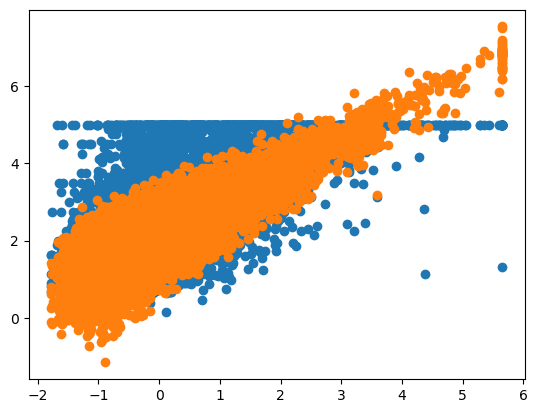

In [100]:
plt.scatter(X_train_norm[:,0], Y)
plt.scatter(X_train_norm[:,0], np.dot(w,  X_train_norm.T) + b)

In [95]:
np.dot(w,  X_train_norm.T) + b

array([4.15704476, 3.71632831, 3.312001  , ..., 0.37053108, 0.63394508,
       0.60376741])